In [11]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.probability import FreqDist
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('amazon_review_data.pd')

In [3]:
df

,reviews,rating
0,I had big expectations because I love English ...,2.0
1,I highly recommend this series. It is a must f...,5.0
2,This one is a real snoozer. Don't believe anyt...,1.0
3,Mysteries are interesting. The tension betwee...,4.0
4,"This show always is excellent, as far as briti...",5.0
...,...,...
1228059,Funny people on here are rating sellers that a...,5.0
1228060,All this is is the Deluxe 32GB Wii U with Mari...,1.0
1228061,The package should have more red on it and sho...,1.0
1228062,Can get this at Newegg for $329.00 and the pac...,1.0


In [4]:
df['rating'] = df['rating'].astype(int)

In [5]:
train_X,test_X,train_y,test_y = train_test_split(df['reviews'], df['rating'], test_size=0.20, random_state=42)
vectorizer = TfidfVectorizer()
train_X = vectorizer.fit_transform(train_X[:10000])
test_X = vectorizer.transform(test_X[:10000])

In [6]:
# clf = MultinomialNB().fit(train_X, train_y[:100000])
from sklearn import svm
clf = svm.SVC()
clf.fit(train_X, train_y[:10000])

SVC()

In [7]:
train_X

<10000x35480 sparse matrix of type '<class 'numpy.float64'>'
	with 724335 stored elements in Compressed Sparse Row format>

0.6052
[[  15    0    6    7  457]
 [   5    0   11   42  412]
 [   1    0   29  119  846]
 [   0    0   15  206 1920]
 [   1    0    3  103 5802]]


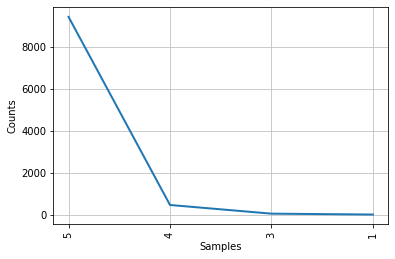

In [8]:
pred_y = []
def evaluate(model):
    pred_y = model.predict(test_X[:10000])
    print(accuracy_score(test_y[:10000],pred_y))
    cm = confusion_matrix(test_y[:10000], pred_y)
    print(cm)
    pred_freq = FreqDist(pred_y)
    pred_freq.plot()
evaluate(clf)

Confusion matrix, without normalization
[[  15    0    6    7  457]
 [   5    0   11   42  412]
 [   1    0   29  119  846]
 [   0    0   15  206 1920]
 [   1    0    3  103 5802]]
Normalized confusion matrix
[[3.09278351e-02 0.00000000e+00 1.23711340e-02 1.44329897e-02
  9.42268041e-01]
 [1.06382979e-02 0.00000000e+00 2.34042553e-02 8.93617021e-02
  8.76595745e-01]
 [1.00502513e-03 0.00000000e+00 2.91457286e-02 1.19597990e-01
  8.50251256e-01]
 [0.00000000e+00 0.00000000e+00 7.00607193e-03 9.62167212e-02
  8.96777207e-01]
 [1.69233373e-04 0.00000000e+00 5.07700118e-04 1.74310374e-02
  9.81892029e-01]]


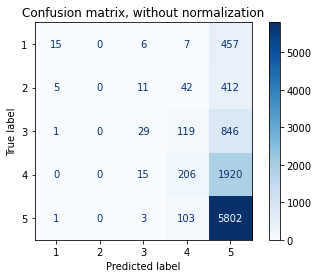

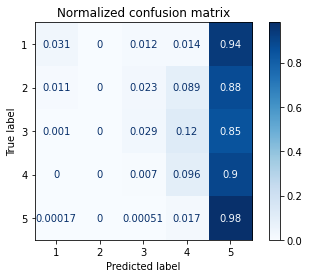

In [12]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_X, test_y[:10000],
                                 display_labels=np.arange(1,6),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()